## EDA on the Medical Conversation Corpus (100k+)

This comprehensive and open-source dataset of 100k+ conversations and instructions that include medical terminologies is perfect for training Generative Language Models for various medical applications. With samples collected from human conversations, this dataset contains a variety of options and suggestions to assist in creating useful language models. From prescribed medications to home remedies such as yoga exercises, breathing exercises, and natural remedies—this collection has it all! Only if you trust the language model you build with the right data can you use it to make decisions that matter in real life. This data is sure to give your project the boost it needs with legitimate information power-packed into every sample!

In [1]:
from collections import Counter
from nltk.corpus import stopwords
import string
import pandas as pd


In [2]:

# Load the training and testing datasets
train_data = pd.read_csv('C:/Users/Averine/VitalStory/w210_VitalStory/Data/train.csv')
test_data = pd.read_csv('C:/Users/Averine/VitalStory/w210_VitalStory/Data/test.csv')

# Display the first few rows of the train dataset
print(train_data.head())


                                        Conversation
0  The conversation between human and AI assistan...
1  The conversation between human and AI assistan...
2  The conversation between human and AI assistan...
3  The conversation between human and AI assistan...
4  The conversation between human and AI assistan...


## Checking Dataset Information 

In [3]:
# Basic information about the dataset
print(train_data.info())
print(test_data.info())

# Check for missing values
print(train_data.isnull().sum())

# Quick summary of numeric columns
print(train_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106556 entries, 0 to 106555
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Conversation  106556 non-null  object
dtypes: object(1)
memory usage: 832.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Conversation  5609 non-null   object
dtypes: object(1)
memory usage: 43.9+ KB
None
Conversation    0
dtype: int64
                                             Conversation
count                                              106556
unique                                             106556
top     The conversation between human and AI assistan...
freq                                                    1


##Text Analysis 

count    106556.000000
mean       1156.366033
std         366.776223
min         497.000000
25%         917.000000
50%        1070.000000
75%        1287.000000
max       11823.000000
Name: text_length, dtype: float64


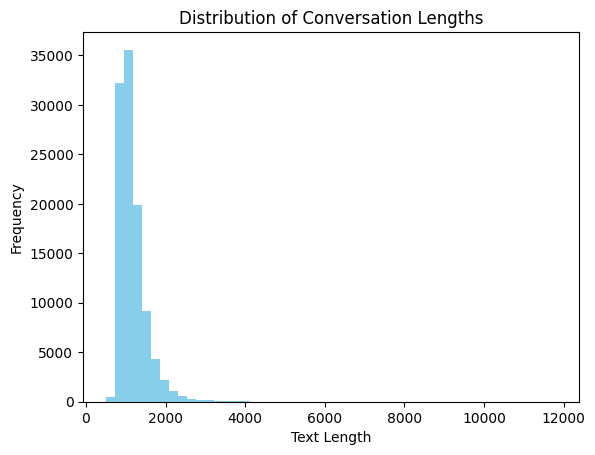

In [4]:
# Add a column for text length
train_data['text_length'] = train_data['Conversation'].str.len()

# Summary statistics for text length
print(train_data['text_length'].describe())

# Visualize the distribution of text lengths
import matplotlib.pyplot as plt

plt.hist(train_data['text_length'], bins=50, color='skyblue')
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [12]:
import pandas as pd
import spacy
import swifter  # For parallel processing

# Load SpaCy model (fastest tokenizer)
nlp = spacy.load("en_core_web_sm")

# Function to tokenize text
def preprocess_text(text):
    doc = nlp(text.lower())  # Tokenize and lowercase
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]  # Remove stopwords
    return tokens

# Use Swifter to parallelize processing
train_data['processed_text'] = train_data['Conversation'].swifter.apply(preprocess_text)


C:\Users\Averine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pandas Apply: 100%|██████████| 106556/106556 [17:32:39<00:00,  1.69it/s]       


count    106556.000000
mean         92.687413
std          29.761402
min          34.000000
25%          73.000000
50%          86.000000
75%         104.000000
max         865.000000
Name: text_length, dtype: float64


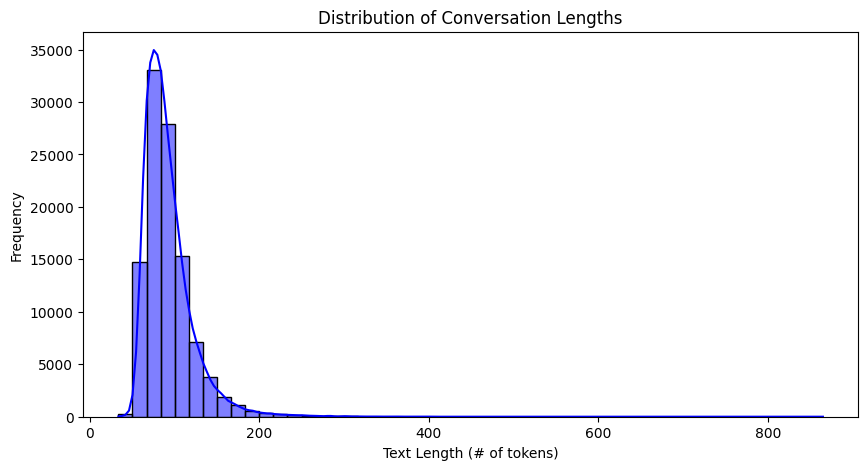

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column with text length
train_data['text_length'] = train_data['processed_text'].apply(lambda x: len(x))

# Summary statistics
print(train_data['text_length'].describe())

# Histogram of text lengths
plt.figure(figsize=(10,5))
sns.histplot(train_data['text_length'], bins=50, kde=True, color="blue")
plt.title("Distribution of Conversation Lengths")
plt.xlabel("Text Length (# of tokens)")
plt.ylabel("Frequency")
plt.show()


### Sentiment Analysis 
Analyzing the overall sentiment of the conversations: 

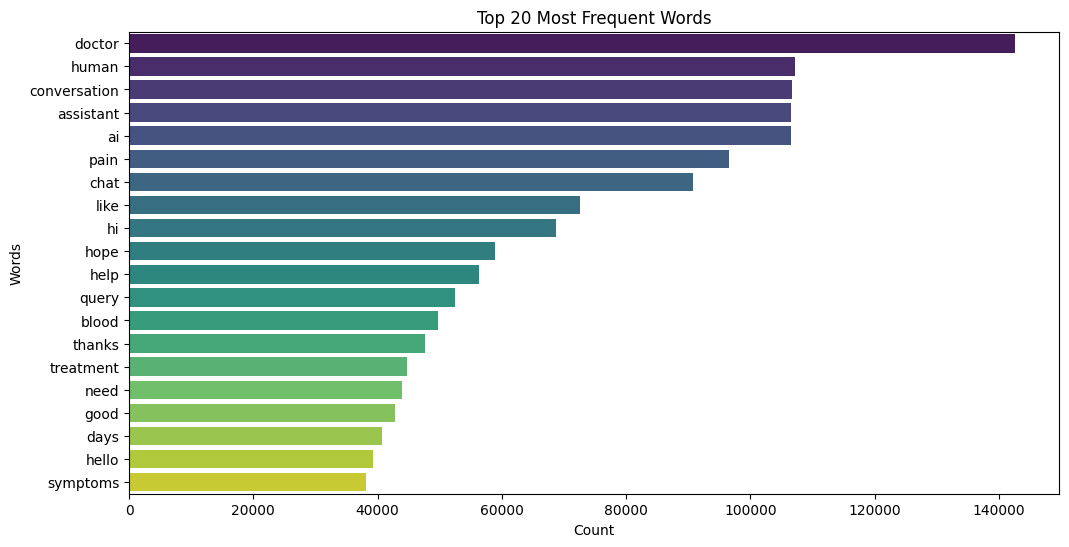

In [14]:
from collections import Counter

# Flatten the list of tokens
all_words = [word for tokens in train_data['processed_text'] for word in tokens]

# Count the most frequent words
word_counts = Counter(all_words).most_common(20)

# Convert to DataFrame for visualization
word_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Plot the top 20 words
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=word_df, palette="viridis")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()


In [ ]:
import scispacy
import spacy

# Load scispaCy model
nlp = spacy.load("en_core_sci_sm")

# Function to extract medical entities (diseases, symptoms, treatments)
def extract_medical_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in ['DISEASE', 'SYMPTOM', 'MEDICATION']]  # Extract only medical terms

# Apply function to extract medical entities
train_data_filtered['medical_entities'] = train_data_filtered['processed_text'].apply(lambda x: extract_medical_entities(' '.join(x)))


C:\Users\Averine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.5.3) was trained with spaCy v3.6.1 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### Optimizing Memory Usage 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Convert processed text back to sentences
sentences = train_data['processed_text'].apply(lambda x: ' '.join(x))

# Function to get n-grams without using excessive memory
def get_top_ngrams(text_series, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(text_series)
    
    # Sum column-wise WITHOUT converting to dense array
    ngram_counts = np.array(X.sum(axis=0)).flatten()
    
    # Get feature names and sort by frequency
    ngram_freq = list(zip(vectorizer.get_feature_names_out(), ngram_counts))
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_k]

# Get the top bigrams and trigrams
top_bigrams = get_top_ngrams(sentences, n=2)
top_trigrams = get_top_ngrams(sentences, n=3)

print("Top 10 Bigrams:", top_bigrams)
print("Top 10 Trigrams:", top_trigrams)


Top 10 Bigrams: [('ai assistant', 106556), ('conversation human', 106556), ('human ai', 106556), ('chat doctor', 89743), ('assistant hi', 24680), ('good health', 15848), ('hope answered', 14579), ('understand concern', 13890), ('welcome chat', 13047), ('let know', 11557), ('blood pressure', 10045), ('hi thanks', 9667), ('wish good', 9501), ('assistant hello', 9128), ('years old', 8988), ('answered query', 8929), ('year old', 8824), ('know assist', 8548), ('hope helps', 7902), ('thanks query', 7373)]
Top 10 Trigrams: [('conversation human ai', 106556), ('human ai assistant', 106556), ('ai assistant hi', 24679), ('welcome chat doctor', 12695), ('wish good health', 9151), ('ai assistant hello', 9128), ('hope answered query', 8846), ('let know assist', 8536), ('query let know', 7061), ('answered query let', 7011), ('chat doctor understand', 7006), ('question chat doctor', 6866), ('thanks question chat', 6251), ('hope answered question', 5318), ('hi welcome chat', 5055), ('thanks chat docto

### Reducing the Vocabulary Size (Set max_features)

In [18]:
def get_top_ngrams_optimized(text_series, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english', max_features=100000)
    X = vectorizer.fit_transform(text_series)
    
    ngram_counts = np.array(X.sum(axis=0)).flatten()
    ngram_freq = list(zip(vectorizer.get_feature_names_out(), ngram_counts))
    
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_k]

# Get optimized bigrams/trigrams
top_bigrams = get_top_ngrams_optimized(sentences, n=2)
top_trigrams = get_top_ngrams_optimized(sentences, n=3)


### Sampling the Data (for faster EDA)

In [19]:
# Sample 10K rows for faster processing
sample_data = train_data.sample(10000, random_state=42)
sentences_sample = sample_data['processed_text'].apply(lambda x: ' '.join(x))

# Run n-gram analysis on sample
top_bigrams = get_top_ngrams(sentences_sample, n=2)
top_trigrams = get_top_ngrams(sentences_sample, n=3)

print("Sampled Top 10 Bigrams:", top_bigrams)
print("Sampled Top 10 Trigrams:", top_trigrams)


Sampled Top 10 Bigrams: [('ai assistant', 10000), ('conversation human', 10000), ('human ai', 10000), ('chat doctor', 8504), ('assistant hi', 2340), ('good health', 1532), ('hope answered', 1395), ('understand concern', 1337), ('welcome chat', 1258), ('let know', 1105), ('blood pressure', 952), ('hi thanks', 919), ('wish good', 908), ('assistant hello', 855), ('years old', 845), ('answered query', 832), ('year old', 822), ('know assist', 798), ('thanks query', 746), ('hope helps', 741)]
Sampled Top 10 Trigrams: [('conversation human ai', 10000), ('human ai assistant', 10000), ('ai assistant hi', 2340), ('welcome chat doctor', 1222), ('wish good health', 865), ('ai assistant hello', 855), ('hope answered query', 827), ('let know assist', 797), ('chat doctor understand', 682), ('question chat doctor', 667), ('query let know', 655), ('answered query let', 649), ('thanks question chat', 616), ('hope answered question', 531), ('thanks chat doctor', 482), ('hi welcome chat', 473), ('doctor u

✅ AI System Patterns
The most frequent bigrams and trigrams suggest that many conversations begin with an introduction by the AI assistant:

- "ai assistant" (106K occurrences)
- "conversation human ai" (106K occurrences)
- "human ai assistant" (106K occurrences)
- "assistant hi" (24K occurrences)
- "ai assistant hello" (9K occurrences)
- "welcome chat doctor" (12K occurrences)

🟢 Interpretation:

- This suggests that a large part of the dataset consists of AI system-generated responses rather than purely human-generated conversations.
- Many conversations might start with an AI assistant greeting the user before discussing medical issues.

✅ Medical Terms and Phrases
Important medical-related bigrams/trigrams:
- "blood pressure" (10K occurrences)
- "years old" (8.9K occurrences)
- "doctor understand concern" (4.7K occurrences)
- "hope answered query" (8.8K occurrences)
- "question chat doctor" (6.8K occurrences)

🟢 Interpretation:

- The dataset contains useful medical discussions, but AI-generated phrases dominate.
- Medical concepts such as age ("years old") and symptoms ("blood pressure") appear frequently.
- Patients likely ask follow-up questions, as seen in "hope answered query", "thanks question chat doctor", and "understand concern".


## Filtring our Ai-generated responses

In [22]:
# Define AI-related phrases to remove
ai_phrases = ["ai assistant", "human ai", "conversation human", "assistant hi", 
              "welcome chat doctor", "hope answered query", "let know assist"]

# Filter dataset by removing rows that contain AI-generated phrases
train_data_filtered = train_data[~train_data['processed_text'].apply(lambda x: any(phrase in x for phrase in ai_phrases))]


## Word Cloud for word frequency analysis Visualization 

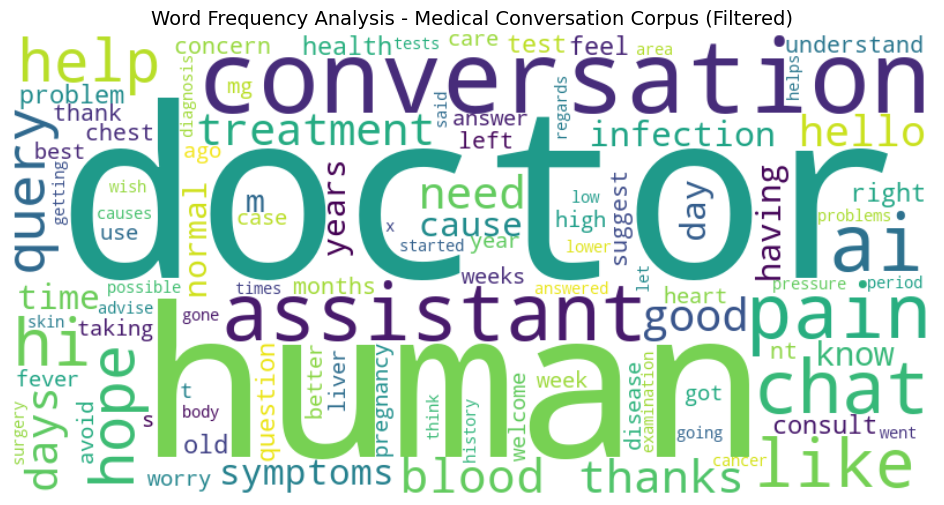

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Combine all processed text into a single string
all_words = ' '.join([' '.join(words) for words in train_data_filtered['processed_text']])

# Generate word frequency dictionary
word_freq = Counter(all_words.split())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Word Frequency Analysis - Medical Conversation Corpus (Filtered)", fontsize=14)
plt.show()
